# Supervised Learning Project


## Problem Description
NYC Taxi Data - Predicting Trip Duration
yellow taxi trip data for March, 2025

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\spencer\.cache\kagglehub\datasets\elemento\nyc-yellow-taxi-trip-data\versions\2


In [13]:
import pandas as pd

df = pd.read_parquet(path+"/yellow_tripdata_2025-03.parquet")

## EDA Procedure

In [13]:
# prints the first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.9,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.5,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.9,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.2,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.6,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75


In [14]:
# gives you the number of rows and columns
df.shape

(4145257, 20)

In [15]:
#provides a summary of the DataFrame, including column names, non-null counts, and data types, which is crucial for the next step (datetime conversion).
df.info

<bound method DataFrame.info of         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2025-03-01 00:17:16   2025-03-01 00:25:52              1.0   
1              1  2025-03-01 00:37:38   2025-03-01 00:43:51              1.0   
2              2  2025-03-01 00:24:35   2025-03-01 00:39:49              1.0   
3              2  2025-03-01 00:56:16   2025-03-01 01:01:35              2.0   
4              1  2025-03-01 00:01:44   2025-03-01 00:10:00              1.0   
...          ...                  ...                   ...              ...   
4145252        2  2025-03-31 23:10:10   2025-03-31 23:42:49              NaN   
4145253        2  2025-03-31 23:14:47   2025-03-31 23:32:05              NaN   
4145254        2  2025-03-31 23:18:16   2025-03-31 23:40:15              NaN   
4145255        2  2025-03-31 23:30:16   2025-03-31 23:52:23              NaN   
4145256        2  2025-03-31 23:26:26   2025-03-31 23:48:30              NaN   

       

Insights: We can see that there are some NaN values showing up here and 'None' values where it should be a Y or N.  We also see a negative value for fare.  Need to handle these later.

In [16]:
# Get summary statistics for numerical columns
# This applies to numerical columns but not all of them
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,4145257,4145257,3.228594e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,3.228594e+06,3.228594e+06,4.145257e+06
mean,2025-03-16 13:03:28.198472,2025-03-16 13:19:27.549571,1.291120e+00,6.584100e+00,1.780034e+01,1.220924e+00,4.785717e-01,2.858856e+00,4.749765e-01,9.571086e-01,2.626590e+01,2.219394e+00,1.351228e-01,5.364268e-01
min,2007-12-05 18:45:00,2007-12-05 19:02:00,0.000000e+00,0.000000e+00,-9.990000e+02,-9.250000e+00,-5.000000e-01,-9.209000e+01,-1.421700e+02,-1.000000e+00,-1.000000e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2025-03-08 16:22:48,2025-03-08 16:39:00,1.000000e+00,1.030000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.566000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2025-03-16 03:02:13,2025-03-16 03:15:59,1.000000e+00,1.800000e+00,1.350000e+01,0.000000e+00,5.000000e-01,2.170000e+00,0.000000e+00,1.000000e+00,2.075000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2025-03-24 09:14:15,2025-03-24 09:31:00,1.000000e+00,3.420000e+00,2.125000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.945000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,2025-04-01 00:00:17,2025-04-03 14:07:50,9.000000e+00,3.201363e+05,4.626388e+04,1.350000e+01,1.050000e+01,2.900000e+02,9.168700e+02,1.000000e+00,4.626944e+04,2.500000e+00,6.750000e+00,1.500000e+00
std,NaN,NaN,7.317500e-01,6.264075e+02,2.910144e+01,1.850192e+00,1.365123e-01,3.844898e+00,2.102796e+00,2.721862e-01,3.195608e+01,9.155162e-01,4.996508e-01,3.569131e-01



--- Counts for all Categorical Columns ---

Counts for VendorID:
VendorID
2    3250790
1     827234
6        163
7          0
Name: count, dtype: int64

Counts for RatecodeID:
RatecodeID
 1.0     2978820
NaN       913721
 2.0      107073
 99.0      43753
 5.0       17318
 3.0        9736
 4.0        7765
 6.0           1
Name: count, dtype: int64

Counts for payment_type:
payment_type
1    2668149
0     913721
2     392601
4      82835
3      20881
Name: count, dtype: int64

Counts for PULocationID:
PULocationID
161    179686
237    168530
132    156024
236    150724
230    134741
        ...  
84          3
199         2
44          2
5           1
204         0
Name: count, Length: 260, dtype: int64

Counts for DOLocationID:
DOLocationID
236    160056
237    152730
161    141890
230    124387
170    116137
        ...  
187        21
44         17
5           7
204         6
2           6
Name: count, Length: 259, dtype: int64


In [17]:
# Target Variable - trip duration in minutes
# convert dropoff and pickup to datetime objects, then convert to seconds, then convert to minutes
# max trip duration is over 6000 minutes.  Need to check/handle outliers.
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,trip_duration
count,4145257,4145257,3.228594e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,4.145257e+06,3.228594e+06,3.228594e+06,4.145257e+06,4.145257e+06
mean,2025-03-16 13:03:28.198472,2025-03-16 13:19:27.549571,1.291120e+00,6.584100e+00,1.780034e+01,1.220924e+00,4.785717e-01,2.858856e+00,4.749765e-01,9.571086e-01,2.626590e+01,2.219394e+00,1.351228e-01,5.364268e-01,1.598918e+01
min,2007-12-05 18:45:00,2007-12-05 19:02:00,0.000000e+00,0.000000e+00,-9.990000e+02,-9.250000e+00,-5.000000e-01,-9.209000e+01,-1.421700e+02,-1.000000e+00,-1.000000e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01,-3.431667e+01
25%,2025-03-08 16:22:48,2025-03-08 16:39:00,1.000000e+00,1.030000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.566000e+01,2.500000e+00,0.000000e+00,0.000000e+00,7.716667e+00
50%,2025-03-16 03:02:13,2025-03-16 03:15:59,1.000000e+00,1.800000e+00,1.350000e+01,0.000000e+00,5.000000e-01,2.170000e+00,0.000000e+00,1.000000e+00,2.075000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.246667e+01
75%,2025-03-24 09:14:15,2025-03-24 09:31:00,1.000000e+00,3.420000e+00,2.125000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.945000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.946667e+01
max,2025-04-01 00:00:17,2025-04-03 14:07:50,9.000000e+00,3.201363e+05,4.626388e+04,1.350000e+01,1.050000e+01,2.900000e+02,9.168700e+02,1.000000e+00,4.626944e+04,2.500000e+00,6.750000e+00,1.500000e+00,6.275833e+03
std,NaN,NaN,7.317500e-01,6.264075e+02,2.910144e+01,1.850192e+00,1.365123e-01,3.844898e+00,2.102796e+00,2.721862e-01,3.195608e+01,9.155162e-01,4.996508e-01,3.569131e-01,2.729762e+01


Insights: VendorID, RatecodeID, PU and DO Location IDs, and payment_type should all be converted to categorical data types.

In [18]:
# Columns to convert to category
categorical_cols = [
    'VendorID',
    'RatecodeID',
    'payment_type',
    'PULocationID',
    'DOLocationID'
]

# Convert columns to 'category' dtype
for col in categorical_cols:
    if col in df.columns: # Check if column exists
        df[col] = df[col].astype('category')

In [27]:
# Loop through all relevant categorical columns
print("\n--- Counts for all Categorical Columns ---")
for col in categorical_cols:
    print(f"\nCounts for {col}:")
    print(df[col].value_counts(dropna=False))


--- Counts for all Categorical Columns ---

Counts for VendorID:
VendorID
2    3250790
1     827234
6        163
7          0
Name: count, dtype: int64

Counts for RatecodeID:
RatecodeID
 1.0     2978820
NaN       913721
 2.0      107073
 99.0      43753
 5.0       17318
 3.0        9736
 4.0        7765
 6.0           1
Name: count, dtype: int64

Counts for payment_type:
payment_type
1    2668149
0     913721
2     392601
4      82835
3      20881
Name: count, dtype: int64

Counts for PULocationID:
PULocationID
161    179686
237    168530
132    156024
236    150724
230    134741
        ...  
84          3
199         2
44          2
5           1
204         0
Name: count, Length: 260, dtype: int64

Counts for DOLocationID:
DOLocationID
236    160056
237    152730
161    141890
230    124387
170    116137
        ...  
187        21
44         17
5           7
204         6
2           6
Name: count, Length: 259, dtype: int64


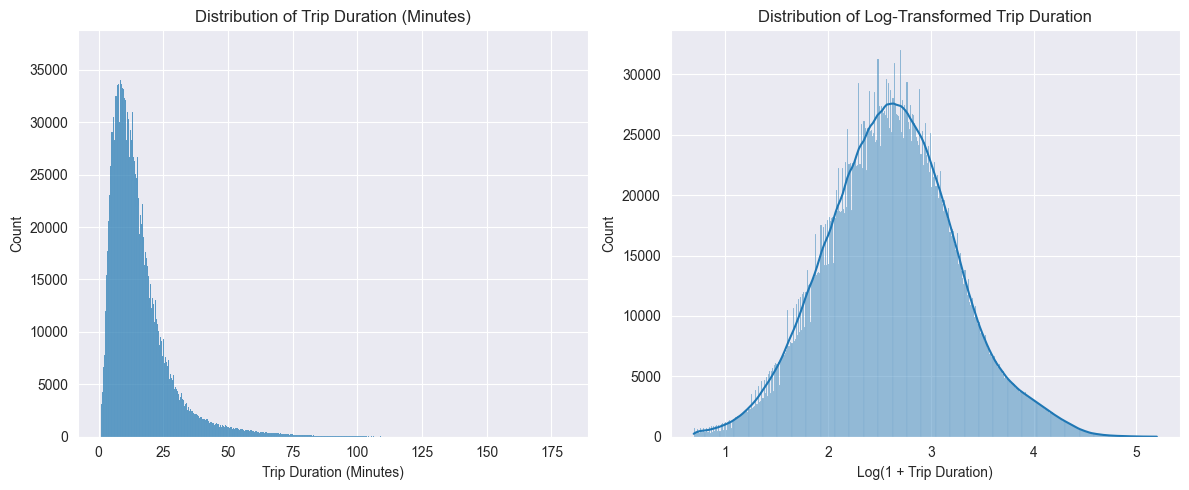

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of trip_duration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'])
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')

# Log transform for better distribution
df.loc[:, 'log_trip_duration'] = np.log1p(df.loc[:, 'trip_duration'])  # log1p handles 0

plt.subplot(1, 2, 2)
sns.histplot(df['log_trip_duration'], kde=True)
plt.title('Distribution of Log-Transformed Trip Duration')
plt.xlabel('Log(1 + Trip Duration)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Count')

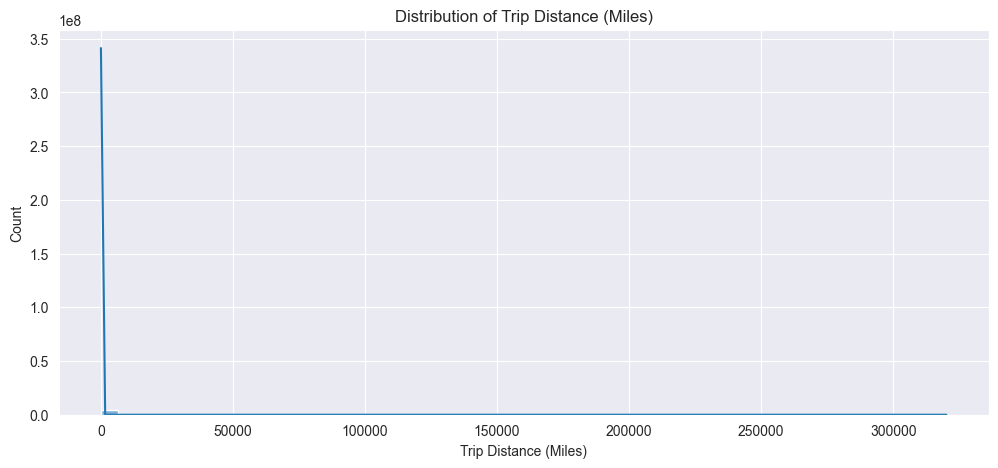

In [24]:
plt.figure(figsize=(12, 5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (Miles)')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Count')

Insights: It appears that the overwhelming majority of trips logged a trip_distance of 0.  Also, there are extreme outliers, trips with thousands of miles, that make the trip_distance column fairly useless.  These rows have passenger_counts (and other columns) with NaN values and appear to be bad rows altogether.  I'm considering dropping the rows altogether.

In [20]:
initial_rows = df.shape[0]
df = df[(df['trip_duration'] >= 1) & (df['trip_duration'] <= 180)] # filter 1 min to 3 hours
rows_after_outlier_removal = df.shape[0]
print(f"\nRemoved {initial_rows - rows_after_outlier_removal} rows due to extreme trip duration outliers.")
print(f"New DataFrame shape: {df.shape}")


Removed 67070 rows due to extreme trip duration outliers.
New DataFrame shape: (4078187, 22)


In [ ]:
initial_rows = df.shape[0]
df = df[(df['trip_distance'] == 0)] # filter trips with distance greater than 0
rows_after_outlier_removal = df.shape[0]
print(f"\nRemoved {initial_rows - rows_after_outlier_removal} rows due to 0 trip distance.")
print(f"New DataFrame shape: {df.shape}")

In [ ]:
#Missing values
print(df.isnull().sum())

There are some features that are conditional on others, like the surcharges and congestion fee, we don't need to do anything to those missing values.  I do want to look into why 'passenger_count' has so many missing values though.

In [ ]:
# Add hour, day, and weekend features based on temporal data
df.loc[:, 'hour_of_day'] = df.loc[:, 'tpep_pickup_datetime'].dt.hour
df.loc[:, 'day_of_week'] = df.loc[:, 'tpep_pickup_datetime'].dt.dayofweek # Monday=0, Sunday=6
df.loc[:, 'is_weekend'] = df.loc[:, 'day_of_week'].isin([5, 6]).astype(int) # 1 if weekend, 0 if weekday

In [ ]:
# Plot the average trip duration by these new features
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x='hour_of_day', y='trip_duration', data=df, errorbar='se')
plt.title('Avg Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Trip Duration (Minutes)')

plt.subplot(1, 3, 2)
sns.lineplot(x='day_of_week', y='trip_duration', data=df, errorbar='se')
plt.title('Avg Trip Duration by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Avg Trip Duration (Minutes)')

plt.tight_layout()
plt.show()

In [ ]:
# Plot trip counts by time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='hour_of_day', data=df)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [ ]:
# Plotting distance vs. trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='trip_duration', data=df.sample(min(1000, len(df)))) # Sample for large data
plt.title('Duration vs. Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

In [ ]:
# other variable analysis section
# Vendor ID analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='VendorID', y='trip_duration', data=df)
plt.title('Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

print("\nVendor ID counts:")
print(df['VendorID'].value_counts())

# Passenger Count analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

print("\nPassenger Count distribution:")
print(df['passenger_count'].value_counts())

In [ ]:
# Calculate Average Speed
df.loc[:, 'avg_speed_mph'] = (df.loc[:, 'trip_distance'] / df.loc[:, 'trip_duration']) * 60
# Handle potential division by zero or very small duration
df.loc[:, 'avg_speed_mph'] = df.loc[:, 'avg_speed_mph'].replace([np.inf, -np.inf], np.nan)
df.loc[:, 'avg_speed_mph'] = df.loc[:, 'avg_speed_mph'].fillna(0) # Or a reasonable average

In [ ]:
# Plot average speed by time features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour_of_day', y='avg_speed_mph', data=df, errorbar='se')
plt.title('Avg Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Speed (mph)')

plt.subplot(1, 2, 2)
sns.lineplot(x='day_of_week', y='avg_speed_mph', data=df, errorbar='se')
plt.title('Avg Speed by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Avg Speed (mph)')
plt.tight_layout()
plt.show()


## Analysis - Model Building and Training

## Result/Evaluation

## Discussion/Conclusion